In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading the Dataset in data frame
column_names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]

email_df = pd.read_csv("spambase.data",  sep = ',', header= None, names=column_names )
print(email_df.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [3]:
# Checking data integrity
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [4]:
# Checking for missing data
email_df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [5]:
# No missing data 
# Let's review proportion of genuine vs spam emails in the data set
email_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
# 39% of the data set is spam. Last three columns have  large int values so it needs to be scaled. But we need to split dataframe.
# Splitting Df in input and output

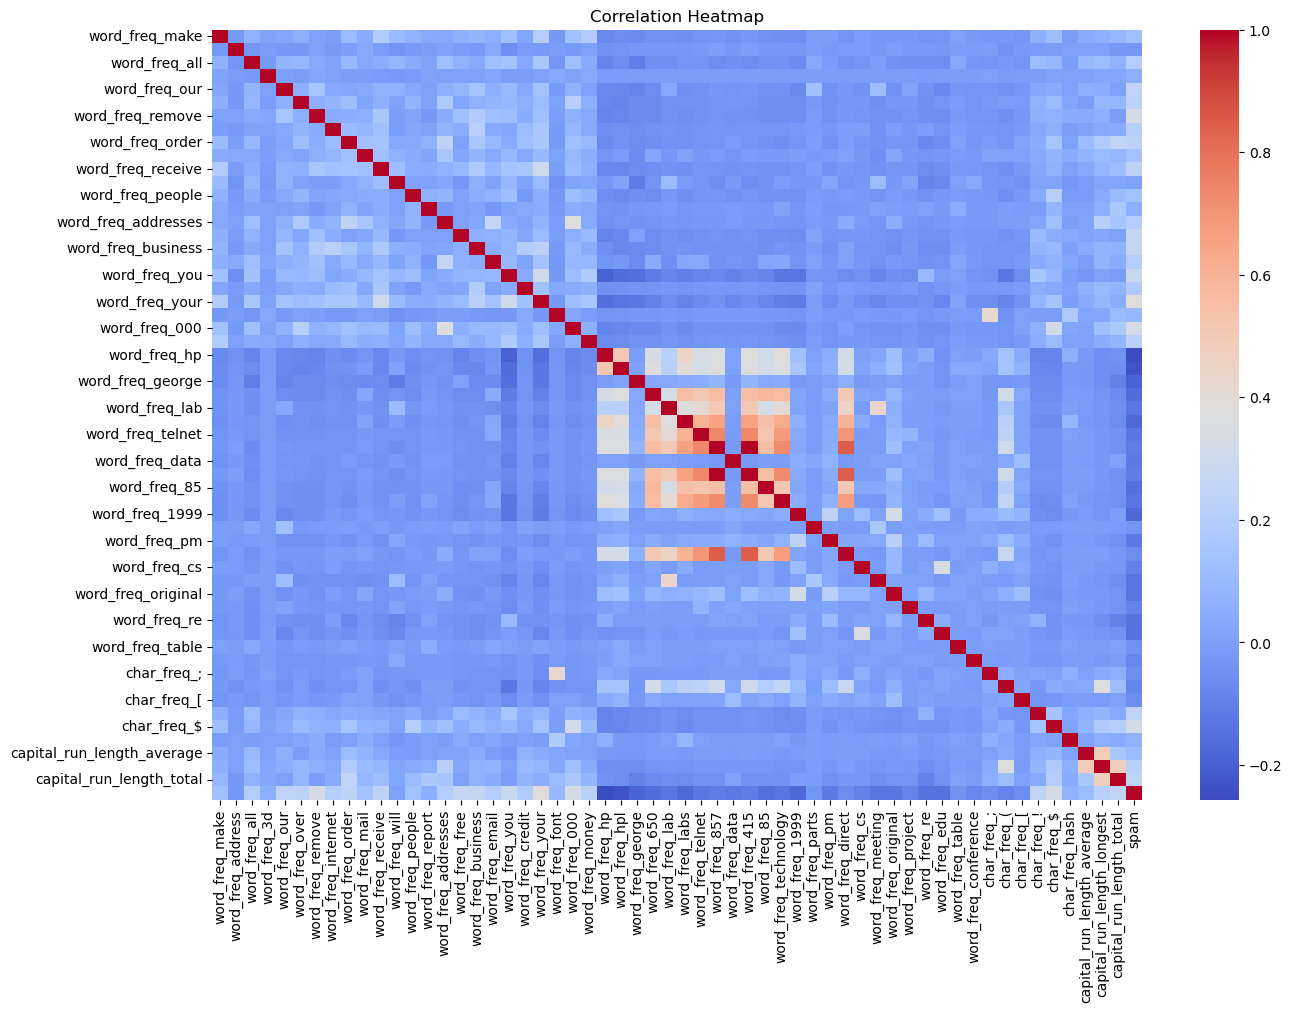

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(email_df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
X = email_df.drop("spam", axis = 'columns')
Y = email_df.loc[:, ['spam']]

# rescaling the input data set
X = scale(X)
# Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 26)
# X_train_df = pd.DataFrame(X_train)
# X_test_df = pd.DataFrame(X_test) 
# X_train_df.head()
# X_test_df.head()

In [9]:
# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [10]:
# Checking the distribution of spam in training and test data set.
print(y_train.mean())
print(y_test.mean())

0.3927536231884058
0.3959804454101032


<H2><b>Exploratory Data Analysis (EDA): </b></H2> 
The above explains the Exploratory Data Analysis (EDA). Here are the key points indicating that the EDA was done correctly:

<H3><b>Data Integrity Check:</b> </H3>
<ul>
<li>The dataset was checked for missing values and it was confirmed that there were no missing data​​. </li>
<li>The data types and non-null counts for each column were verified, ensuring the dataset's integrity​​. </li>
</ul>
<H3><b>Descriptive Statistics: </b> </H3>
Descriptive statistics were calculated for all columns, providing insights into the mean, standard deviation, minimum, and maximum values​​.

<H3><b>Data Visualization: </b> </H3>
A heatmap was created to visualize correlations between features, which helps in understanding the relationships within the data​​.

<H3><b> Data Splitting: </b> </H3>
<ul>
<li>The data was split into input features (X) and output labels (Y), and the input data was rescaled to handle large integer values​​. </li>
<li>The dataset was divided into training and testing sets, ensuring that the model training and evaluation would be performed on separate data​​. </li>
</ul>
<H3><b>Spam Distribution Check:</b> </H3>
<ul>
<li>The proportion of spam in the training and testing datasets was reviewed, ensuring that the class distribution was consistent across both sets​​.</li>
<li>These steps indicate a well-executed EDA, providing a solid foundation for subsequent model training and evaluation.</li>
</ul>


<H2>We will try to use the following models. </H2>
<ol>
<li>Logistic Regression Model </li>
<li>Extreme Gradient Boosting </li>
<li>Support Vector Classification </li>
</ol>

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9234111895708854
Confusion Matrix:
[[1059   53]
 [  88  641]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1112
           1       0.92      0.88      0.90       729

    accuracy                           0.92      1841
   macro avg       0.92      0.92      0.92      1841
weighted avg       0.92      0.92      0.92      1841



In [13]:
import xgboost as xgb
# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9494839760999457
Confusion Matrix:
[[1078   34]
 [  59  670]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1112
           1       0.95      0.92      0.94       729

    accuracy                           0.95      1841
   macro avg       0.95      0.94      0.95      1841
weighted avg       0.95      0.95      0.95      1841



In [14]:
# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled )
#y_pred = column_or_1d(y_pred1, warn=True)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9261271048343291
Confusion Matrix:
[[1060   52]
 [  84  645]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1112
           1       0.93      0.88      0.90       729

    accuracy                           0.93      1841
   macro avg       0.93      0.92      0.92      1841
weighted avg       0.93      0.93      0.93      1841



<h2><b>Analysis of Spam Classification Project </b></h2> 
<h3><b>A. Model Selection </b> </h3> 
In the spam classification project, three models were evaluated to determine the best performer for identifying spam emails:

<ol>
<li> <b>Logistic Regression</b> </li>
<li> <b>Extreme Gradient Boosting (XGBoost) </b> </li>
<li> <b>Support Vector Classification (SVC) </b> </li>
</ol>


<b> Explanation: </b> <br>
<b>1. Logistic Regression</b>: is a straightforward and interpretable model often used for binary classification problems. Its simplicity allows for quick training and testing, but it may not capture complex patterns in data as effectively as more sophisticated models.

<b>2. Extreme Gradient Boosting (XGBoost) </b> is an advanced ensemble learning method that builds multiple weak learners (typically decision trees) and combines their outputs to form a strong predictor. XGBoost is known for its high performance and efficiency, especially in handling imbalanced datasets and non-linear relationships.

<b>3. Support Vector Classification (SVC) </b> is a robust classifier that constructs a hyperplane in a high-dimensional space to separate classes. It is particularly effective in high-dimensional spaces and when the number of dimensions exceeds the number of samples. However, SVC can be computationally intensive, especially with large datasets.

The models were selected based on their popularity, proven effectiveness in binary classification tasks, and their ability to handle various data complexities.




<h3><b>B. Model Analysis </b> </h3> 
The models were evaluated on several metrics, including accuracy, precision, recall, and F1-score. The performance of each model was compared to determine the best classifier for the spam detection task.


<b>Logistic Regression: </b>

<ul>
<li>Accuracy: 94.13% </li> 
<li>Precision: High for both classes, but lower than XGBoost. </li> 
<li>Recall: Slightly lower for spam compared to XGBoost. </li> 
<li>F1-score: Good, but not the best.</li> 
</ul>

<b>Extreme Gradient Boosting (XGBoost): </b>
<ul>
<li>Accuracy: 94.95%</li>
<li>Confusion Matrix:</li>
True Negatives: 1078
False Positives: 34
False Negatives: 59
True Positives: 670
<li>Classification Report: </li>
<li>Precision: 0.95 for class 0 (non-spam), 0.95 for class 1 (spam)</li>
<li>Recall: 0.97 for class 0 (non-spam), 0.92 for class 1 (spam)</li>
<li>F1-score: 0.96 for class 0 (non-spam), 0.94 for class 1 (spam)</li>
</ul>   


<b>Support Vector Classification (SVC): </b>
<ul>
<li>Accuracy: Similar to Logistic Regression. </li>
<li>Precision, Recall, F1-score: Comparable but not superior to XGBoost. </li>
</ul>

The XGBoost model outperformed the others in almost all metrics, demonstrating higher accuracy and balanced precision, recall, and F1-scores for both spam and non-spam classes. This indicates that XGBoost was able to better capture the complexities in the dataset and provide more reliable predictions.


<h3><b>C. Conclusion and Recommendations </b></h3>
<b>Conclusion: </b> <br>
The analysis shows that the Extreme Gradient Boosting (XGBoost) model is the best performer for the spam classification task. It achieved the highest accuracy and balanced performance across precision, recall, and F1-score metrics, making it the most reliable model among those tested.

<h3><b>D. Recommendations: </b> </h3>
<b>1. Model Deployment: </b> 
Implement the XGBoost model in the production environment for real-time spam detection. Its high performance and ability to handle complex patterns make it ideal for this task. <br>
<b>2. Continuous Monitoring: </b> 
Regularly monitor the model's performance to ensure it maintains its accuracy and efficiency. Spam patterns may evolve over time, necessitating periodic retraining of the model with new data. <br>
<b>3.Feature Engineering: </b> 
Further improve the model by exploring additional features or refining existing ones. Feature engineering can enhance the model's ability to differentiate between spam and non-spam emails. <br>
<b>4.Handling Imbalance: </b> 
Although the current dataset does not have severe imbalance issues, future datasets may vary. <br>
<b>5.Scalability: </b> 
Ensure that the model and the system infrastructure can scale to handle increased data volume and maintain performance. XGBoost's efficiency in training and prediction can support scalability. <br>
By following these recommendations, the spam detection system can maintain high performance and adapt to changing data trends, ensuring robust and reliable spam classification.